# Baseline model

## Imports

In [1]:
from fastai.imports import *


## Data Processing

Get the dataset appropriately whether we're in kaggle or not

In [2]:
import os
competition_name = "icr-identify-age-related-conditions"

is_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if is_kaggle:
    path = Path(f"/kaggle/input/{competition_name}")
else:
    import zipfile, kaggle
    path = Path.home() / '.kaggle' / 'input' / competition_name
    kaggle.api.competition_download_cli(competition_name, path=path.parent)
    zipfile.ZipFile(f'{path}.zip').extractall(path)

icr-identify-age-related-conditions.zip: Skipping, found more recently modified local copy (use --force to force download)


Load the datasets.

In [3]:
path.ls()

(#4) [Path('/home/krm/.kaggle/input/icr-identify-age-related-conditions/test.csv'),Path('/home/krm/.kaggle/input/icr-identify-age-related-conditions/greeks.csv'),Path('/home/krm/.kaggle/input/icr-identify-age-related-conditions/train.csv'),Path('/home/krm/.kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')]

In [4]:
df_train = pd.read_csv(f'{path}/train.csv')
df_test = pd.read_csv(f'{path}/test.csv')
df_train.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214    5.555634  ...  7.298162   1.73855   
1  3.632190  0.025578  13.517790    1.229900  ...  0.173229   0.49706   
2  6.732840  0.025578  12.824570    1.229900  ...  7.709560   0.97556   
3  3.685344  0.025578  11.053708    1.229900  ...  6.122162   0.49706   
4  3.942255  0.054810   3.396778  102.151980  ...  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

Identify null values.

In [5]:
df_train.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

We'll only do simple data processing. We'll replace null values with modes, and convert EJ to a categorical columns

In [7]:
modes = df_train.mode().iloc[0]

In [8]:
def process_data(df):
    df.fillna(modes, inplace=True)
    df["EJ"] = pd.Categorical(df.EJ)
    
process_data(df_train)
process_data(df_test)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Id      617 non-null    object  
 1   AB      617 non-null    float64 
 2   AF      617 non-null    float64 
 3   AH      617 non-null    float64 
 4   AM      617 non-null    float64 
 5   AR      617 non-null    float64 
 6   AX      617 non-null    float64 
 7   AY      617 non-null    float64 
 8   AZ      617 non-null    float64 
 9   BC      617 non-null    float64 
 10  BD      617 non-null    float64 
 11  BN      617 non-null    float64 
 12  BP      617 non-null    float64 
 13  BQ      617 non-null    float64 
 14  BR      617 non-null    float64 
 15  BZ      617 non-null    float64 
 16  CB      617 non-null    float64 
 17  CC      617 non-null    float64 
 18  CD      617 non-null    float64 
 19  CF      617 non-null    float64 
 20  CH      617 non-null    float64 
 21  CL      617 non-

In [10]:
df_train.EJ.cat.codes.head()

0    1
1    0
2    1
3    1
4    1
dtype: int8

Separately identify the categorical, numeric and dependent variables

In [11]:
categoricals = ["EJ"]
dependent = "Class"
conts = [column for column in df_train.columns if not column in categoricals + [dependent] + ["Id"]]

In [12]:
len(conts)

55

## Binary Splits

A decision tree is build on binary splits, so we start by splitting on categorical column `EJ` just to see what results it gives us. We use seaborn to compare see how splitting on EJ relates to the outcome (diagnosed to have one of the age-related conditions).

[Text(0.5, 1.0, 'Histogram')]

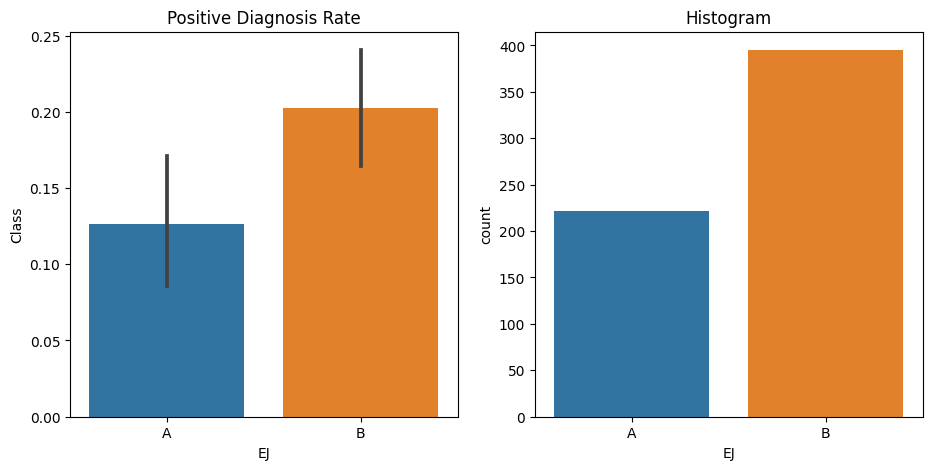

In [13]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(11, 5))
sns.barplot(data=df_train, y=dependent, x="EJ", ax=axs[0]).set(title="Positive Diagnosis Rate")
sns.countplot(data=df_train, x="EJ", ax=axs[1]).set(title="Histogram")

We have a higher positivity rate for category B (~ 20%) than category A (~ 3%). We also have much higher proportion of observations with category B (~ 400) than category A (~ 230). This correlation could in part explain why B has a higher positivity rate.

We can also do a split based on a continuous column. Since these columns are anonymized, we'll go with column `AB` just for demonstration. We use a boxplot to compare the averages of both positive and negative diagnosis based on the trait `AB` and a density plot to visualize the distribution of observations on `AB`.

<Axes: xlabel='AB', ylabel='Density'>

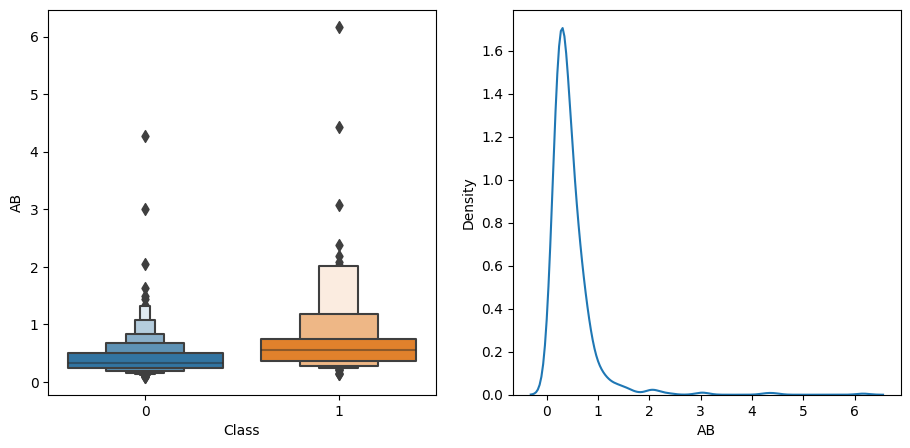

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
sns.boxenplot(data=df_train, x=dependent, y="AB", ax=ax1)
sns.kdeplot(data=df_train, x="AB", ax=ax2)

What we see is that the observations that result in a positive diagnosis have a slightly higher average of value `AB` than those that don't. We also notice that there some outliers with higher values for `AB`. It is difficult to determine the value of `AB` that best splits between the two classes though, since most of the observations are between 0 and 1 for `AB`, although the average value of negative diagnosis (class 0) appears below 0.5.

Since we have quite a number of columns, it would be tedious to plot each of them and figure out how well it partitions between positive and negative diagnosis, and which value of that column gives the best split.

We can however create a function that will help us quickly evaluate different splits by calculating a measure of impurity of how a split divides the observations into 2 groups, i.e. how similar or dissimilar they are with respect to the dependent variable.

We measure similarity by calculating the standard deviation of the dependent variable within each group of the split. The lower it is, they more similar the observations in each group are. We multiply this by the number of observations in each group since the bigger the group, they more weight it has.

We calculate the score of a split by summing the scores of the left side and the right side of that split using a particular value of that column.

In [15]:
def score(col, y, split_value):
    lhs = col <= split_value
    return (_side_score(lhs, y) + _side_score(~lhs, y))/len(y)

def _side_score(side, y):
    count = side.sum()
    if count <=1: return 0
    return y[side].std() * count

For instance, the score based on value 0.5 for columns `AB`:

In [16]:
score(df_train.AB, df_train[dependent], 0.5)

0.36017711175753037

For the categorical column, we'd need to replace the column string values with their underlying codes, since we're calculating scores using numeric values.


In [17]:
df_train_n = df_train.copy()
df_train_n[categoricals] = df_train_n[categoricals].apply(lambda x: x.cat.codes)
df_train_n[categoricals].head()

EJ
0   1
1   0
2   1
3   1
4   1

We then calculate the score using <= 1 as our split

In [18]:
score(df_train_n.EJ, df_train_n[dependent], 1)

0.3803100751041243

Looks like the split on the categorical fares a bit worse than that of column `AB` at 0.5

To help us find the best split point, we'll iterate through the columns, and for each, we iterate through it's unique values to find the best split point for the column.

For example to find the best split point for column `AB`:

In [19]:
col = df_train_n["AB"]
y = df_train_n[dependent]
uniques = col.unique()
uniques.sort()
uniques[:50]

array([0.081187 , 0.08546  , 0.098279 , 0.102552 , 0.111098 , 0.119644 ,
       0.1217805, 0.1303265, 0.132463 , 0.136736 , 0.141009 , 0.145282 ,
       0.149555 , 0.153828 , 0.1559645, 0.158101 , 0.1602375, 0.162374 ,
       0.166647 , 0.17092  , 0.175193 , 0.179466 , 0.183739 , 0.1858755,
       0.188012 , 0.1901485, 0.192285 , 0.196558 , 0.200831 , 0.2029675,
       0.205104 , 0.209377 , 0.21365  , 0.217923 , 0.222196 , 0.2243325,
       0.226469 , 0.230742 , 0.235015 , 0.239288 , 0.243561 , 0.247834 ,
       0.252107 , 0.25638  , 0.260653 , 0.2627895, 0.264926 , 0.269199 ,
       0.2713355, 0.273472 ])

In [20]:
scores = np.array([score(col, y, split) for split in uniques])
uniques[scores.argmin()]

0.410208

This tells us that the value of `AB` that gives the best split is 0.410208.

We can implement this idea to calculate the best split point for any given column.

In [21]:
def min_column(df, col_name):
    col, y = df[col_name], df[dependent]
    uniques = col.unique()
    scores = np.array([score(col, y, split) for split in uniques])
    index = scores.argmin()
    return uniques[index], scores[index]

In [22]:
min_column(df_train_n, "AB")

(0.410208, 0.3561906829723693)

We can try the same thing for the categorical variable:

In [23]:
min_column(df_train_n, "EJ")

(0, 0.3773339803468088)

Turns out having all observations on one side gives a better score when looking at the categorical column alone.

We can then calculate the best split points for each column to find the best split overall.

In [24]:
columns = conts + categoricals
splits = {col: min_column(df_train_n, col) for col in columns}

In [25]:
splits

{'AB': (0.410208, 0.3561906829723693),
 'AF': (2808.64232, 0.35583548065304915),
 'AH': (193.801377, 0.3761985927636321),
 'AM': (149.318758, 0.367338331639673),
 'AR': (16.327194, 0.3678281215243884),
 'AX': (17.877462, 0.37677322461475915),
 'AY': (0.6019965, 0.37677322461475915),
 'AZ': (10.971782, 0.3782810033906922),
 'BC': (13.500788, 0.35968813799570454),
 'BD ': (12083.34891, 0.3749922782916859),
 'BN': (21.186, 0.3651185274145938),
 'BP': (196.710795, 0.3725348222558456),
 'BQ': (115.695865, 0.3668876611761174),
 'BR': (3466.745415, 0.374094640781585),
 'BZ': (2885.319798, 0.376211243844383),
 'CB': (13.32695, 0.37775055805021784),
 'CC': (0.5478777, 0.3665150807004323),
 'CD ': (85.955376, 0.3635292346687648),
 'CF': (1.8504485, 0.367406050093466),
 'CH': (0.016318, 0.3782672405025747),
 'CL': (1.24754, 0.37657306471010377),
 'CR': (0.527325, 0.35228611051878406),
 'CS': (62.2516675, 0.37277362672289577),
 'CU': (1.274427, 0.37534114864714596),
 'CW ': (35.67944, 0.3772898765

In [26]:
min_score = 1
for k, v in splits.items():
    if v[1] < min_score:
        min_score = v[1]
        min_score_column = k
min_score_column, splits[min_score_column]        

('DU', (2.27601, 0.3207517917154871))

According to this, the column `DU` gives the best score at split point 2.27601 overall. We can make a simple model based off this approach. This will be a variant of what is called the [OneR](https://link.springer.com/article/10.1023/A:1022631118932) classifier.

In [27]:
from sklearn.model_selection import train_test_split

one_r_train, one_r_val = train_test_split(df_train_n,  test_size=0.25)

In [28]:
one_r_train.shape, one_r_val.shape

((462, 58), (155, 58))

We split each of training and validation sets to independent and dependent variables.

In [29]:
def x_y(df):
    return df[conts + categoricals], df[dependent]

one_r_train_x, one_r_train_y = x_y(one_r_train)
one_r_val_x, one_r_val_y = x_y(one_r_val)

We get the best split using the OneR training set.

In [30]:
one_r_splits = {col: min_column(one_r_train, col) for col in one_r_train_x.columns}
one_r_splits

{'AB': (0.410208, 0.35281387905213274),
 'AF': (2823.29663, 0.35724190866995587),
 'AH': (117.170886, 0.3779194957048336),
 'AM': (149.318758, 0.3609105741224039),
 'AR': (15.973224, 0.3684987466681436),
 'AX': (17.877462, 0.37592969382891867),
 'AY': (0.595602, 0.37592969382891867),
 'AZ': (8.520304, 0.3789134523026233),
 'BC': (13.500788, 0.3550724560499435),
 'BD ': (12083.34891, 0.37592969382891867),
 'BN': (20.8329, 0.3707394688622878),
 'BP': (369.34407, 0.3718284509406249),
 'BQ': (115.695865, 0.36740725189507994),
 'BR': (4291.904627, 0.37687518279877813),
 'BZ': (2885.319798, 0.3754958283567254),
 'CB': (18.299281, 0.37792252321358455),
 'CC': (0.28939032, 0.36629236555563865),
 'CD ': (88.15936, 0.36554117602111524),
 'CF': (1.8504485, 0.36642812739167485),
 'CH': (0.012338, 0.3786568763505195),
 'CL': (1.24754, 0.3790680163512013),
 'CR': (0.689775, 0.3459180650047119),
 'CS': (62.2516675, 0.3731018554335032),
 'CU': (1.274427, 0.3773706669092076),
 'CW ': (35.67944, 0.37539

In [31]:
def get_best_split(splits):
    min_score = 1
    for k, v in splits.items():
        if v[1] < min_score:
            min_score = v[1]
            min_score_column = k
    return min_score_column, splits[min_score_column]

column, split = get_best_split(one_r_splits)
column, split

('DU', (2.034615, 0.32022256415000827))